# 二値分類タスクにおける評価指標

書籍p.67~72

## ・正例か負例かを予測値とする場合

## Confusion matrix

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

# 二値分類なので0, 1で表現
y_true = [1, 0, 1, 1, 0, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1, 1]


'''
tp(True positive)  (予測:正　予測値:正例)
tn(True negative)  (予測:正　予測値:負例)
fp(False positive) (予測:誤　予測値:正例)
fn(False negative) (予測:誤　予測値:負例)
'''
tp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
tn = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
fp = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
fn = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))

confusion_matrix1 = np.array(([tp, fp],
                              [fn, tn]))
print(confusion_matrix1)
print()
print(np.array((['tp', 'fp'],
                ['fn', 'tn'])))

[[3 1]
 [2 2]]

[['tp' 'fp']
 ['fn' 'tn']]


行列内の数は当てはまるレコード数

[['tp' 'fn']
 ['fp' 'tn']]


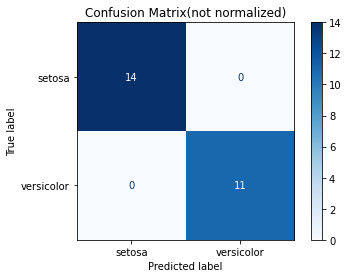

In [2]:
# 参考: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# scikit-learnのplot confusion matrix の使用例

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# 2値分類を解くので、2クラスのみ抽出。
iris = datasets.load_iris()
X = iris.data[:100]
y = iris.target
y = np.delete(y, np.where(y == 2))
class_names = np.array(['setosa', 'versicolor'])

train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42)
model = svm.SVC(kernel='linear', C=0.01).fit(train_x, train_y)

title = 'Confusion Matrix(not normalized)'
disp = plot_confusion_matrix(model, test_x, test_y, display_labels=class_names, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

# scikit-learnのconfusion matrixは転置している為、対応表をプリント。
print(np.array((['tp', 'fp'],
                ['fn', 'tn'])).T)

plt.show()

## Accuracy, Error rate

$$
\large Accuracy=\frac{TP+TN}{TP+TN+FP+FN}
$$

$$
\large ErrorRate=1-Accuracy
$$

・正答率と誤答率。上記はConfusionMatrixの要素を用いた式。

・不均衡データの場合、モデルの評価をしづらく、分析コンペではあまり使われない。

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.625


## Precision, Recall

$$
\large Precision=\frac{TP}{TP+FP} 
$$

$$
\large Recall=\frac{TP}{TP+FN}
$$

・適合率と再現率。accuracy, error rateと同様にConfusionMatrixの要素を用いた式。

・２つとも０〜１の値をとり、1に近づくほどよいスコア。

・この2つはトレードオフの関係にあり、どちらか一方のみ値を高くしようとすると、片方が低くなる。
<br>その為どちらか単体で分析コンペの指標として使われることはない。

・誤検知を避けたい場合はprecisionを重視し、正例の見逃しを避けたい場合はrecallを重視することになる。

In [4]:
from sklearn.metrics import precision_score, recall_score

precision_score = precision_score(y_true, y_pred)
recall_score = recall_score(y_true, y_pred)

print('precision_score: ', precision_score)
print('recall_score: ', recall_score)

precision_score:  0.75
recall_score:  0.6


## F1-score, Fβ-score

$$
\large F1=\frac{2}{\frac{1}{recall}+\frac{1}{precision}}=\frac{2\cdot recall\cdot precision}{recall+precision}=\frac{2TP}{2TP+FP+FN}
$$

$$
\large F\beta=\frac{(1+\beta^2)}{\frac{\beta^2}{recall}+\frac{1}{precision}}=\frac{(1+\beta^2)\cdot recall\cdot precision}{recall+\beta^2precision}
$$

・F1スコアはprecisionとrecallの調和平均で計算され、これら２つのバランスを取った指標となっている。F値とも言われる。

・Fβスコアはrecallをどれだけ重視するかを表す係数βによって調整した指標。

・F1スコアは分子がTPのみになっており、正例と負例を対称に扱っていない。<br>
（真の値と予測値それぞれの正例と負例を入れ替わると挙動が変わる。）

In [5]:
from sklearn.metrics import f1_score, fbeta_score

f1_score = f1_score(y_true, y_pred)
fbeta_score = fbeta_score(y_true, y_pred, beta=0.5)

print('f1_score: ', f1_score)
print('fbeta_score: ', fbeta_score)

f1_score:  0.6666666666666665
fbeta_score:  0.7142857142857143


## MCC(Matthews Correlation Coefficient)

$$
\large MCC = \frac{TP \times TN \times FP \times FN} {\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$

・不均衡なデータに対してのモデルの評価性能を適切にしやすい指標。

・-1 ~ +1の範囲の値をとり、<br>
+1: 完璧な予測<br>
&nbsp;0: ランダムな予測<br>
-1: 完全に反対の予測<br>
と見ることができる。

・F1スコアと違い、正例と負例について対称に扱っている。

In [6]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef = matthews_corrcoef(y_true, y_pred)

print(matthews_corrcoef)

0.2581988897471611
